
- name - название аниме
- genres - жанры аниме
- type - формат аниме ('TV', 'TV Special', 'Movie', 'OVA', 'ONA', 'Special')
- episodes - количество эпизодов
- status - статус аниме (закончено/В настоящее время выходит в эфир/Еще не вышел в эфир)
- aired_from - дата начала
- aired_to - дата окончания
- duration_per_ep - длительность эпизода
- score - средняя оценка пользователей
- scored_by - количество оценок
- rank - ранг на сайте MyAnimeList
- rating - возратсной рейтинг
- studios - студия производства
- producers	- продюсеры 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('popular_anime.csv')
df.head(3)

,id,name,genres,type,episodes,status,aired_from,aired_to,duration_per_ep,score,scored_by,rank,rating,studios,producers,image,trailer,synopsis
0,52991,Frieren: Beyond Journey's End,"Adventure, Drama, Fantasy",TV,28.0,Finished Airing,2023-09-29T00:00:00+00:00,2024-03-22T00:00:00+00:00,24 min per ep,9.30,676737.0,1.0,PG-13 - Teens 13 or older,Madhouse,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",https://cdn.myanimelist.net/images/anime/1015/...,https://www.youtube.com/watch?v=ZEkwCGJ3o7M,During their decade-long quest to defeat the D...
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",TV,64.0,Finished Airing,2009-04-05T00:00:00+00:00,2010-07-04T00:00:00+00:00,24 min per ep,9.10,2223666.0,2.0,R - 17+ (violence & profanity),Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",https://cdn.myanimelist.net/images/anime/1208/...,https://www.youtube.com/watch?v=1ac3_YdSSy0,After a horrific alchemy experiment goes wrong...
2,9253,Steins;Gate,"Drama, Sci-Fi, Suspense",TV,24.0,Finished Airing,2011-04-06T00:00:00+00:00,2011-09-14T00:00:00+00:00,24 min per ep,9.07,1467570.0,3.0,PG-13 - Teens 13 or older,White Fox,"Frontier Works, Media Factory, Kadokawa Shoten...",https://cdn.myanimelist.net/images/anime/1935/...,https://www.youtube.com/watch?v=27OZc-ku6is,Eccentric scientist Rintarou Okabe has a never...


In [4]:
df.shape

(28825, 18)

Удалим не нужные столбцы

In [6]:
df = df.drop(['image', 'trailer','synopsis','id','producers'], axis = 1)

в данном анализе мы будем рассматривать только сериалы, спец выпуски и фильмы по аниме, поэтому удалим прочие типы

In [8]:
type_animation = ['TV', 'TV Special', 'Movie', 'OVA', 'ONA', 'Special']
df = df[df['type'].isin(type_animation)]

посмотрим на информацию о данных

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23851 entries, 0 to 28824
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             23851 non-null  object 
 1   genres           21018 non-null  object 
 2   type             23851 non-null  object 
 3   episodes         23173 non-null  float64
 4   status           23851 non-null  object 
 5   aired_from       22975 non-null  object 
 6   aired_to         10718 non-null  object 
 7   duration_per_ep  23851 non-null  object 
 8   score            15762 non-null  float64
 9   scored_by        15762 non-null  float64
 10  rank             21666 non-null  float64
 11  rating           23222 non-null  object 
 12  studios          15732 non-null  object 
dtypes: float64(4), object(9)
memory usage: 2.5+ MB


Преобразуем столбцы в формат datetime

In [12]:
df['aired_from'] = pd.to_datetime(df['aired_from'])
df['aired_to'] = pd.to_datetime(df['aired_to'])

Преобразуем duration_per_ep в числовой столбец, хранящий минуты

In [14]:
# Функция для преобразования в минуты
def convert_to_minutes(duration):
    # Разбиваем строку на части по пробелам
    parts = duration.split()
    
    # Инициализация переменных для часов и минут
    hours = 0
    minutes = 0
    
    # Проверяем, есть ли "hr" (часы) в строке
    if "hr" in parts:
        # Если есть, то берем число перед "hr"
        hours = int(parts[parts.index("hr") - 1])
    
    # Проверяем, есть ли "min" (минуты) в строке
    if "min" in parts:
        # Если есть, то берем число перед "min"
        minutes = int(parts[parts.index("min") - 1])
    
    # Переводим все в минуты
    total_minutes = hours * 60 + minutes
    return total_minutes

# Применяем функцию к столбцу
df["duration_per_ep"] = df["duration_per_ep"].apply(convert_to_minutes)


проверим пропуски

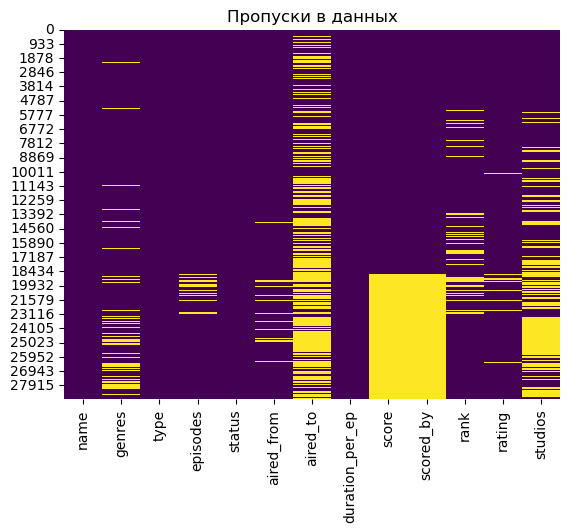

In [16]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Пропуски в данных')
plt.show()

In [17]:
long = df.shape[0]
print("пропущено жанров:", df['genres'].isna().sum()*100/long, '%')
print("пропущено дата начала:", df['aired_from'].isna().sum()*100/long, '%')
print("пропущено дата конца:", df['aired_to'].isna().sum()*100/long, '%')
print("пропущено количество эпизодов:", df['episodes'].isna().sum()*100/long, '%')
print("пропущенный тип:", df['type'].isna().sum()*100/long, '%')
print("пропущенный рейтинг:", df['rating'].isna().sum()*100/long, '%')
print("пропущенн ранг:", df['rank'].isna().sum()*100/long, '%')

пропущено жанров: 11.877908683074084 %
пропущено дата начала: 3.6728019789526645 %
пропущено дата конца: 55.06268081002893 %
пропущено количество эпизодов: 2.84264810699761 %
пропущенный тип: 0.0 %
пропущенный рейтинг: 2.6372059871703493 %
пропущенн ранг: 9.161041465766635 %


- пропущенные жанры. Аниме чьи жанры не определенны можно оставить так как их много и это колонка достаточно важна для анализа
- удалим строки где пропущенна дата начала, возможно данное аниме только анонсированно без даты
- строки с неизвестной даты конца мы оставим, так как аниме может быть не завершенно на данный момент или имеет формат для которого не указывается дата конца. Также заменим пропуски на UNKNOWN
- удалим строки с пропущенными эпизодами
- пропущен возрастной рейтинг в размере 2.6%, эти данные можно удалить
- rank - это позиция аниме в топе MyAnimeList, пропуски могут означать, что аниме еще не вышло или аниме содержит откровенные сексуальные сцены (причина почему оно не ранжируется). Оставим его
- остальные колонки с пропусками мы тоже оставим, так как это поле не обязательное и может иметь остуствие из за небольшой популярности

In [19]:
df['aired_to'] = df['aired_to'].fillna('UNKNOWN')

In [20]:
df = df.dropna(subset=['aired_from']) 
df = df.dropna(subset=['aired_to']) 
df = df.dropna(subset=['episodes']) 
df = df.dropna(subset=['rating'])

Удалим дубликаты

In [22]:
df = df.drop_duplicates()

In [23]:
df.describe()

,episodes,duration_per_ep,score,scored_by,rank
count,22089.000000,22089.000000,15519.000000,1.551900e+04,20474.000000
mean,15.597945,24.784282,6.481117,3.554346e+04,10406.897236
std,50.238119,25.253875,0.899911,1.315306e+05,6233.036205
min,1.000000,0.000000,1.890000,1.020000e+02,0.000000
25%,1.000000,8.000000,5.870000,5.640000e+02,5035.250000
50%,3.000000,23.000000,6.480000,2.431000e+03,10220.000000
75%,13.000000,26.000000,7.130000,1.517000e+04,15653.750000
max,3057.000000,168.000000,9.300000,2.943048e+06,21729.000000


### Анализ 

__Какие студии выпустили больше всего работ__

In [26]:
sns.set_style('darkgrid')

In [27]:
df['Studio'] = df['studios'].str.split(',')
df = df.explode('Studio').reset_index()

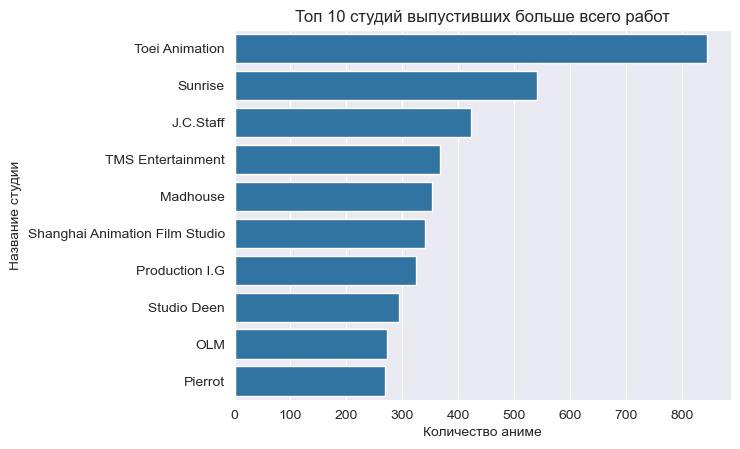

In [28]:
top_studios_count = df.groupby('Studio', as_index = False)['name'].count()
top_studios_count = top_studios_count.sort_values(by = 'name', ascending = False).head(10)
plt.title('Топ 10 студий выпустивших больше всего работ')
plt.xlabel('Количество аниме')
plt.ylabel('Название студии');
sns.barplot(data = top_studios_count, y = 'Studio', x = 'name');

__Количество выпускаемых аниме в год__

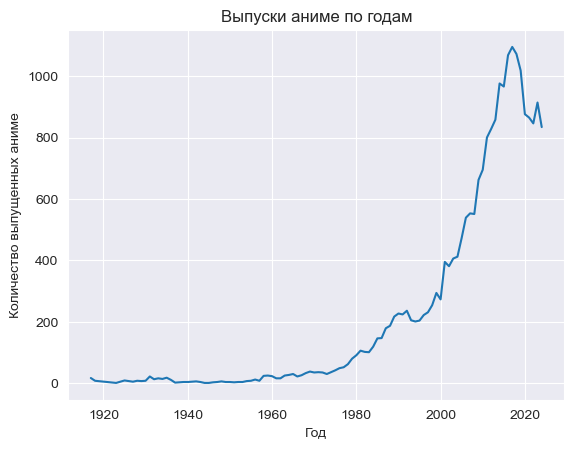

In [30]:
# создадим колонку, которая будет хранить год выпуска
df['year'] = df['aired_from'].dt.year
count_anime_year = df[df['year']<2025].groupby('year',as_index = False)['name'].count()
plt.title('Выпуски аниме по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных аниме');
plt.plot(count_anime_year['year'],count_anime_year['name']);

In [31]:
peak_year = count_anime_year.sort_values(by='name', ascending=False).head(1).iloc[0, 0]
count_anime = count_anime_year.sort_values(by='name', ascending=False).head(1).iloc[0, 1]
print('Пик производства аниме пришелся на', peak_year)
print('Было выпущено:', count_anime)

Пик производства аниме пришелся на 2017
Было выпущено: 1095


__Как распределенны оценки пользователей__

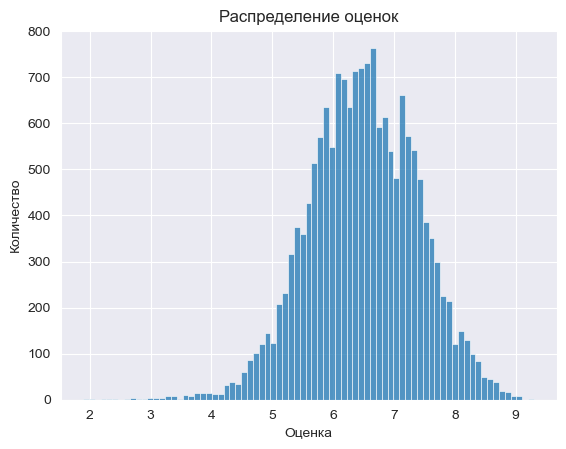

In [33]:
plt.title('Распределение оценок')
sns.histplot(data = df, x = 'score')
plt.xlabel('Оценка')
plt.ylabel('Количество');

__Как связанны количество оценок и средняя оценка__

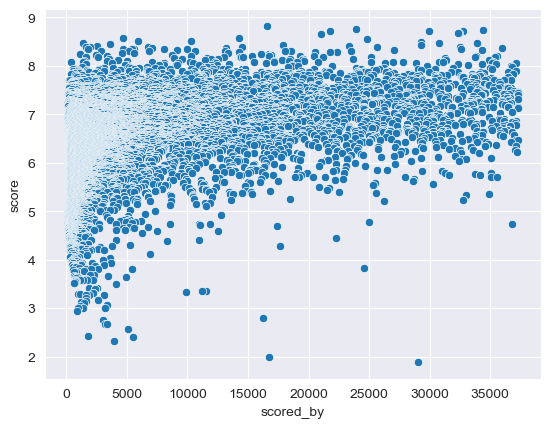

In [35]:
# ограничим выбросы 
p75 = df['scored_by'].quantile(0.75)
IQR = p75 - df['scored_by'].quantile(0.25)
up = p75 + IQR*1.5 # верхняя граница
sns.scatterplot(data = df[df['scored_by']<up], x = 'scored_by', y = 'score');

__Какие студии больше всего вовлекли зрителя__

в качестве метрики вовлеченности будет использована сумма оценок аниме, оценка которых выше среднего (6.8)

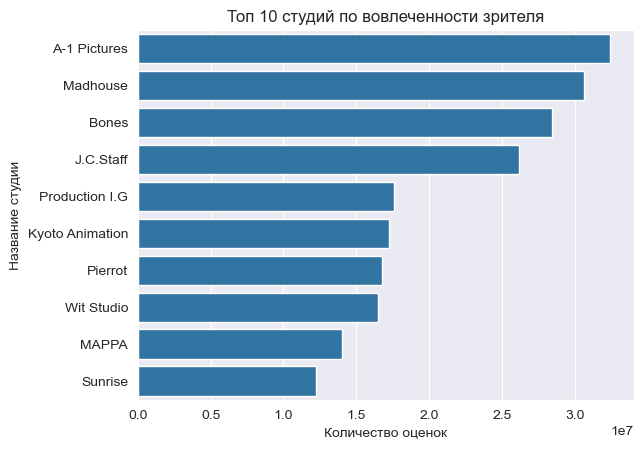

In [38]:
top_studio_er = df[df['score']>6.8].groupby('Studio', as_index = False).agg({'scored_by':'sum'})
top_studio_er = top_studio_er.sort_values(by = ['scored_by'], ascending = False).head(10)
plt.title('Топ 10 студий по вовлеченности зрителя')
plt.xlabel('Количество оценок')
plt.ylabel('Название студии');
sns.barplot(data = top_studio_er, x = 'scored_by', y = 'Studio');

__Топ студии по средней оценке__

<Axes: title={'center': 'Топ 10 студий по средней оценке всех работ'}, xlabel='Средняя оценка', ylabel='Название студии'>

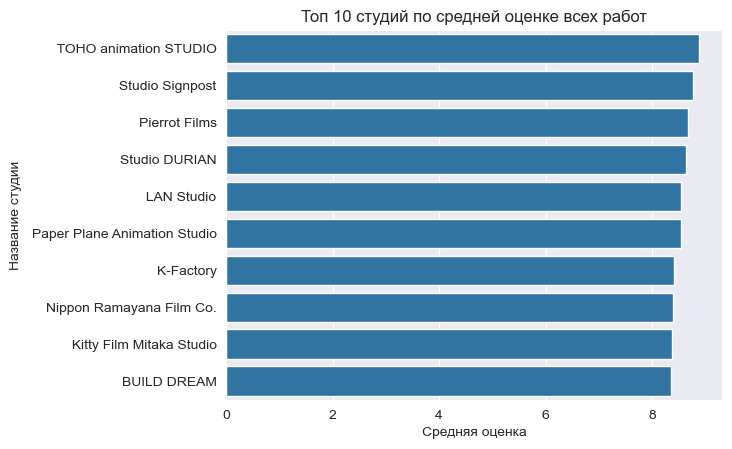

In [40]:
top_studio_score = df[df['scored_by']>1000].groupby('Studio', as_index = False)['score'].mean()
top_studio_score = top_studio_score.sort_values(by = 'score', ascending = False).head(10)
plt.title('Топ 10 студий по средней оценке всех работ')
plt.xlabel('Средняя оценка')
plt.ylabel('Название студии');
sns.barplot(data = top_studio_score, y = 'Studio', x = 'score')

У большинства студий в топе(даже приближенных к топу) примерно равная средняя оценка все аниме работ

__Популярные жанры__

Text(0, 0.5, 'Жанры')

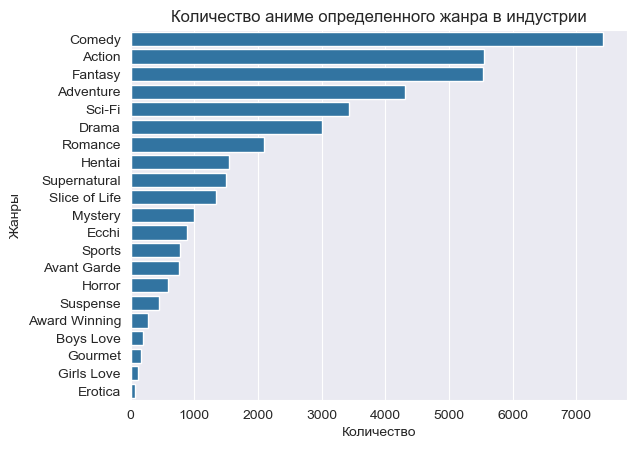

In [43]:
genre_series = df['genres'].dropna().str.split(', ').explode()
top_genres = genre_series.value_counts().reset_index()
plt.title('Количество аниме определенного жанра в индустрии')
sns.barplot(data= top_genres, x = 'count', y ='genres')
plt.xlabel('Количество')
plt.ylabel('Жанры')

__топ жанров/сочетаний жанров по вовлеченности__

метрика вовлеченности будет рассчитанна также как и для студий по среднему количеству оценок

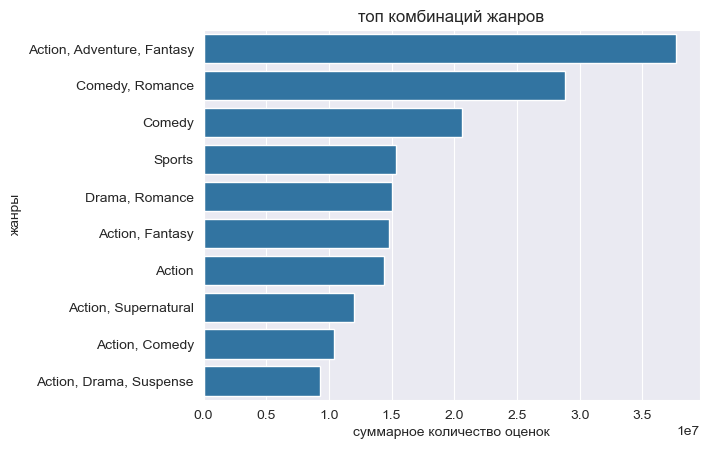

In [46]:
top_genres_er = df[df['score']>6.8].groupby('genres', as_index = False)['scored_by'].sum().sort_values(by = 'scored_by', ascending = False).head(10)
plt.title('топ комбинаций жанров')
sns.barplot(data = top_genres_er, x = 'scored_by', y = 'genres');
plt.xlabel('суммарное количество оценок')
plt.ylabel('жанры');

__Какой формат аниме получает в среднем наибольшее количество оценок__

форматы:
- ONA - собый формат аниме-сериалов, которые официально публикуются в интернете на сайтах с поддержкой потокового видео, минуя телевидение
- OVA - Так обозначают эпизоды, созданные специально для выпуска на видеоносителях — сначала видеокассет VHS, а затем LaserDisc и DVD
- Special - дополнительная серия (или отдельный ролик, фильм), приуроченная к какому-либо событию.
- TV special - в аниме — это история, показанная в форме отдельной серии по телевидению. Обычно такие серии создаются к праздникам, сменам сезона телесериала, иногда выходят после завершения показа аниме на телевидении.
- Movie -  это полнометражный фильм (кинофильм). Изначально такие проекты предназначены для показа в кинотеатрах, по формату соответствуют обычному фильму
- TV - формат, предназначенный для телевизионного эфира.

<Axes: title={'center': 'Среднее количество оценок на формат аниме'}, xlabel='Среднее количество оценок', ylabel='Формат'>

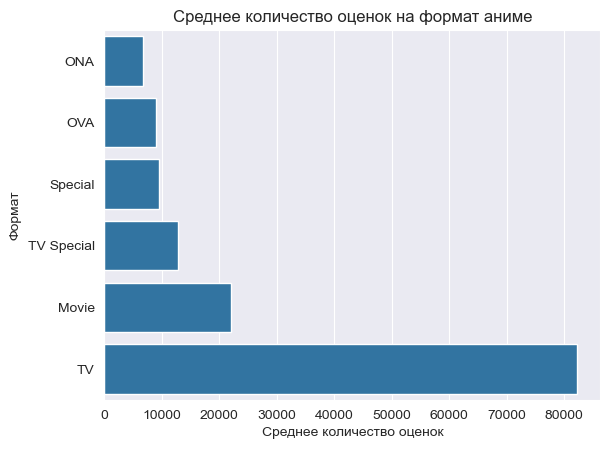

In [49]:
top_type = df.groupby('type', as_index = False)['scored_by'].mean().sort_values(by = 'scored_by')
plt.title('Среднее количество оценок на формат аниме')
plt.xlabel('Среднее количество оценок')
plt.ylabel('Формат');
sns.barplot(data = top_type, y = 'type', x = 'scored_by')

__Сколько длится эпизод в каждом формате__

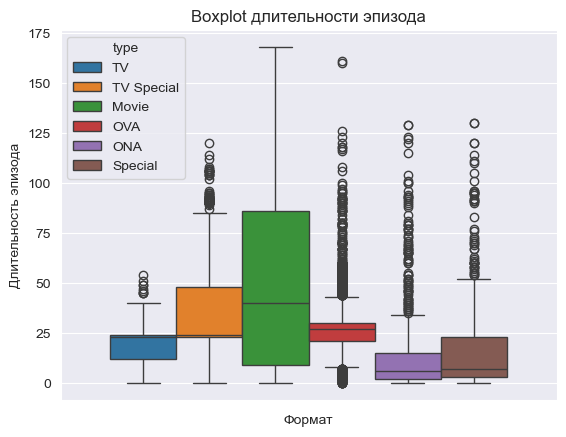

In [51]:
plt.title('Boxplot длительности эпизода')
plt.ylabel('Длительность эпизода')
plt.xlabel('Формат');
sns.boxplot(data = df , y = 'duration_per_ep', hue = 'type');

__Выводы__

- __Toei Animation__ - студия, выпустившая, наибольше количество аниме (более 800)
- Активность в 2000-2017 годах: Похоже, что этот период стал настоящим расцветом индустрии аниме
- 2017 год самый плодотворный в истории аниме, было выпущено около 1095 аниме
- Аниме у которого низкое число оценок имеет наибольшую вариативность средней оценки в районе 4.4-7.5 по 10 шкале, что может сильно искажать действительно ли аниме качественное. Аниме с наибольшим число оценок имеет узкий и плотный коридор в районе 6-8
- Студии A-1 pictures, Madhouse, Bones, J.C. staff значительно больше других студий завлекли зрителя (сумарно более 26 147 329 оценок получила каждая студия по своим работам)
- Средняя оценка всех работ топовых студий не сильно отличается и находмться в районе 8/10
- Наибольшее количество аниме имеет жанр Комедия
- Наиболее популярная комбинация жанра Экшен/Приключение/фантастика
- Самый часто оцениваемый формат аниме - TV
- Длительность эпизода TV аниме по медиане составила около 24 минут, специальные серии (TV special) имеют медиану чуть выше 25, но при этом вариативность длительности эпизода гораздо выше. Ova по времени часто совпадает с TV аниме и TV special
- Наибольшую вариативность получили фильмы по аниме(movie) их медианное значение около 40 минут.
- ONA и special в среднем длятся менее 15 минут, но бывают выбросы которые могут длиться столько же как и фильмы.

Гипотезы:
- Влияние рейтингов: Очень интересное наблюдение про низкое количество оценок и вариативность. Это подтверждает, что аниме с меньшим количеством зрителей может иметь искусственно завышенные или заниженные оценки.
-  Возможно, динамичные и захватывающие истории привлекают больше зрителей, чем более эмоционально насыщенные жанры.